<a href="https://colab.research.google.com/github/sharvani1357/Stacking-ensemble-LoanPrediction/blob/main/stacking(socialcsv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
x=df.iloc[:, [2,3]].values
y=df.iloc[:, -1].values

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Define Base Models

In [ ]:
base_models=[
    ('lr',LogisticRegression()),
    ('dt',DecisionTreeClassifier(max_depth=3)),
    ('knn',KNeighborsClassifier(n_neighbors=5))
]

## Define Meta Model

###

In [ ]:
meta_model=LogisticRegression()

## Build Stacking Classifier

In [ ]:
classifier=StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)
classifier.fit(x_train,y_train)


StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(max_depth=3)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [ ]:
print(accuracy_score(y_test,classifier.predict(x_test)))
cm=confusion_matrix(y_test,classifier.predict(x_test))
print(cm)

0.9
[[47  5]
 [ 3 25]]


<Axes: >

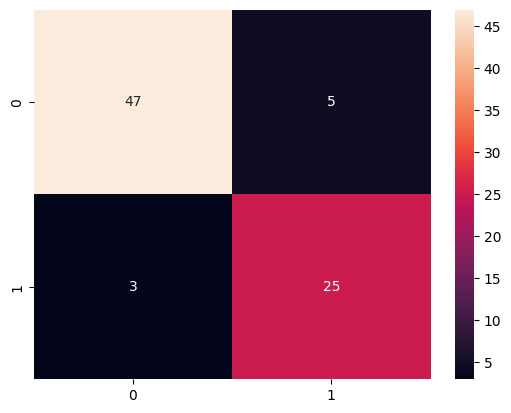

In [ ]:
sns.heatmap(cm,annot=True)